In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [71]:
x = nn.Conv2d(3,16,3)

In [72]:
y = nn.Conv2d(16,32,3,groups=16)

In [7]:
z = nn.Conv2d(16,32,3,dilation=2)

In [74]:
img = torch.rand((3,32,32))

In [76]:
out1 = x(img)

In [77]:
out1.shape

torch.Size([16, 30, 30])

In [79]:
out2 = y(out1)

In [81]:
out2.shape

torch.Size([32, 28, 28])

In [82]:
# import matplotlib.pyplot as plt
# plt.imshow(img.reshape(32,32,3))

In [16]:
x = x(img)

torch.Size([30, 30])


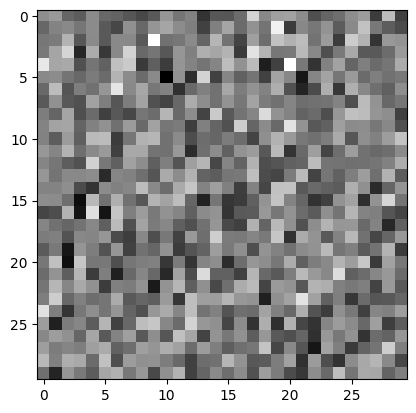

In [26]:
vx = torch.sum(x,axis=0)
print(vx.shape)
plt.imshow(vx.detach().numpy(),cmap='gray')

In [34]:
y = y(x)

In [35]:
y.shape

torch.Size([32, 28, 28])

In [38]:
z = z(x)

In [39]:
z.shape

torch.Size([32, 26, 26])

In [40]:
a = nn.Conv2d(3,32,3,stride=2)

In [42]:
a = a(img)

In [43]:
a.shape

torch.Size([32, 15, 15])

In [51]:
a = nn.Conv2d(3,32,3,stride=2,padding=1)

In [52]:
a(img).shape

torch.Size([32, 16, 16])

In [53]:
x.shape

torch.Size([16, 30, 30])

In [54]:
img.shape

torch.Size([3, 32, 32])

In [57]:
a = nn.Conv2d(3,32,3,stride=2,padding=1)

In [58]:
a(img).shape

torch.Size([32, 16, 16])

In [67]:
b = nn.Conv2d(3,32,3,dilation=2,padding=2)

In [68]:
b(img).shape

torch.Size([32, 32, 32])

In [84]:
img = torch.rand([128,32,32])

In [85]:
conv1 = nn.Conv2d(128,256,3)

In [87]:
conv1(img).shape

torch.Size([256, 30, 30])

In [88]:
conv2 = nn.Conv2d(128,256,3,groups=128)

In [89]:
conv2(img).shape

torch.Size([256, 30, 30])

In [90]:
conv1.weight.shape

torch.Size([256, 128, 3, 3])

In [91]:
conv2.weight.shape

torch.Size([256, 1, 3, 3])

In [1]:
from model import *

In [2]:
from utils import *

In [3]:
model = Model()

In [4]:
get_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,496
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 32, 30, 30]          18,464
             ReLU-10           [-1, 32, 30, 30]               0
      BatchNorm2d-11           [-1, 32, 30, 30]              64
          Dropout-12           [-1, 32, 30, 30]               0
           Conv2d-13           [-1, 32, 30, 30]          18,464
             ReLU-14           [-1, 32,

c:\Users\SriHarsha\Desktop\S6\S9\model.py:112: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


(Model(
   (layer1): Sequential(
     (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (3): Dropout(p=0.1, inplace=False)
   )
   (layer2): Sequential(
     (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (3): Dropout(p=0.1, inplace=False)
   )
   (dil1): Sequential(
     (0): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), dilation=(2, 2))
     (1): ReLU()
     (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (3): Dropout(p=0.1, inplace=False)
   )
   (layer3): Sequential(
     (0): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1))
     (1): ReLU()
     (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   )
   (layer4): Sequentia